## Creating, Fitting and Testing Models

We will create the following models:

* LinearRegression
* PolynomicalRegression
* Lasso
* Ridge
* DecisionTree
* RandomForest
* SVM
* KNN

Each model well be created and trained twice, once using the data as is and again with a standarization of the data to see the difference in  each type of model.

We will show the Predictions of each one aswell as the MAE, MSE, RMSE and Score.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#We load the data from the treated CSV file
#Note that as this is a regression problem, we transformed the categorical values 
#to numerical values with get_dummies in the Data.ipynb file, and in the treated CSV file we previously
#dropped all the categorical values 
df = pd.read_csv("../data/processed/Insurance_treated_data.csv")

In [4]:
df.head()

,Unnamed: 0,age,sex_male,smoker_yes,bmi,children,charges
0,0,21.0,1,0,25.745000,2,3279.868550
1,1,37.0,0,1,25.744165,3,21454.494239
2,2,18.0,1,0,30.030000,1,1720.353700
3,3,37.0,1,0,30.676891,3,6801.437542
4,4,58.0,1,0,32.010000,1,11946.625900


In [5]:
#as can happen sometimes when loading a CSV file, the Unnamed column is created, we drop it
df.drop(['Unnamed: 0'],1, inplace=True)

In [6]:
df.head()

,age,sex_male,smoker_yes,bmi,children,charges
0,21.0,1,0,25.745000,2,3279.868550
1,37.0,0,1,25.744165,3,21454.494239
2,18.0,1,0,30.030000,1,1720.353700
3,37.0,1,0,30.676891,3,6801.437542
4,58.0,1,0,32.010000,1,11946.625900


In [7]:
#We select our X (Features) and Y (Target) in this case as we want to determine the
#price of the insurance policy "charges" will be our target, we will compare it with 
#all the others characteristics of the costumers.
X = df.iloc[:, :-1]
y = df["charges"]

In [8]:
#We do the Split and we get both our Train and Test sets.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [9]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2904, 5)
(726, 5)
(2904,)
(726,)


## MODELING

In [10]:
#We import all the libraries related to the models:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

### LINEAR REGRESSION

First we will start with a regular lineal regression using the prices (charges) as the dependent variable.

In [11]:
lin_reg = LinearRegression()
lin_reg = lin_reg.fit(X_train, y_train)

Linear Regression Predictions Scores:

In [12]:
predictions = lin_reg.predict(X_test)
print('The model performance:' ) 
print('-------------------------------')
print('SCORE:', lin_reg.score(X_test, y_test))
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

The model performance:
-------------------------------
SCORE: 0.7166401269119228
MAE: 3827.2299645835415
MSE: 32646918.480969243
RMSE: 5713.748198946926


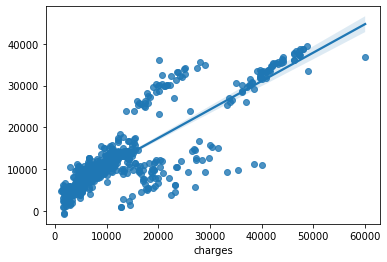

In [13]:
#Ideally it should plot a 45 degree line if the models was "perfect", nonetheless we see that it it's not. 
y_pred = lin_reg.predict(X_test)
sns.regplot(y_test, y_pred);

### POLYNOMIAL REGRESSION

We continue with a Polynomial Regression to see if there is a non-linear relationship between the independent and dependent variables

In [14]:
poly_reg = PolynomialFeatures(degree=2)
poly_reg.fit(X_train), 
X_poly = poly_reg.transform(X_train)

pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)

LinearRegression()

In [15]:
X_poly_test = poly_reg.transform(X_test)

Polynomial Regression Prediction Scores:

In [16]:
predictions = pol_reg.predict(X_poly_test)
print('The model performance:' ) 
print('-------------------------------')
print('SCORE:', pol_reg.score(X_poly_test, y_test))
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

The model performance:
-------------------------------
SCORE: 0.8002352605879072
MAE: 2948.802887077854
MSE: 23015620.002524164
RMSE: 4797.459744752859


### LASSO

Now we will use a lasso model, this model is used to obtain the subset of predictors that minimizes prediction error for a quantitative response variable

In [17]:
Lasso = Lasso()
Lasso = Lasso.fit(X_train, y_train)

Lasso Predictions:

In [18]:
predictions = Lasso.predict(X_test)
print('The model performance:' ) 
print('-------------------------------')
print('SCORE:', Lasso.score(X_test, y_test))
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

The model performance:
-------------------------------
SCORE: 0.7166012197630451
MAE: 3827.922279590007
MSE: 32651401.114674192
RMSE: 5714.140452830521


### RIDGE

Ridge is used to see if, by analyzing multiple regression data, this suffer from multicollinearity and adds a degree of bias to the regression estimates, ridge regression reduces the standard errors

In [19]:
Ridge = Ridge()
Ridge = Ridge.fit(X_train, y_train)

Ridge Predictions:

In [20]:
predictions = Ridge.predict(X_test)
print('The model performance:' ) 
print('-------------------------------')
print('SCORE:', Ridge.score(X_test, y_test))
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

The model performance:
-------------------------------
SCORE: 0.7164797946182013
MAE: 3832.446737826939
MSE: 32665390.94591619
RMSE: 5715.364463086863


### Decision Tree Regressor

The ide of using a Decision Tree Regressor is to break down the dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed.

In [21]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

Decision Tree Predicitions:

In [22]:
predictions = dtr.predict(X_test)
print('The model performance:' ) 
print('-------------------------------')
print('SCORE:', dtr.score(X_test, y_test))
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

The model performance:
-------------------------------
SCORE: 0.8152301617829547
MAE: 1527.1297253847088
MSE: 21288003.06223586
RMSE: 4613.892398207381


### Random Forest Regressor

We try a Random Forest Regressor as it provides higher accuracy through cross validation. Random forest classifier will handle the missing values and maintain the accuracy of a large proportion of data.

In [23]:
rf = RandomForestRegressor(max_depth=2, random_state=0)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=0)

Random Forest Predictions:

In [24]:
predictions = rf.predict(X_test)
print('The model performance:' ) 
print('-------------------------------')
print('SCORE:', rf.score(X_test, y_test))
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

The model performance:
-------------------------------
SCORE: 0.7581842765526131
MAE: 3395.583009302942
MSE: 27860466.355974015
RMSE: 5278.301465052372


### Support Vector Machine (SVM)

The SVM uses a technique called the kernel trick to transform your data and then based on these transformations it finds an optimal boundary between the possible outputs. Simply put, it does some extremely complex data transformations, then figures out how to seperate your data based on the labels or outputs you've defined. This can be used both in Regression and Classification problems, hences it can be used here.

In [25]:
svr = svm.SVR(C=1.0, epsilon=0.2)
svr.fit(X_train, y_train)


SVR(epsilon=0.2)

SVM Predictions:

In [26]:
predictions = svr.predict(X_test)
print('The model performance:' ) 
print('-------------------------------')
print('SCORE:', svr.score(X_test, y_test))
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

The model performance:
-------------------------------
SCORE: -0.09938744777267572
MAE: 6894.188003246588
MSE: 126664414.39038593
RMSE: 11254.528616978409


### KNN

Since our dataset is relatively small, we can employ KNN as it should classifie new data points based on the similarity measure of the earlier stored data points.

In [27]:
knn = KNeighborsRegressor(n_neighbors=1000)
knn.fit(X_train, y_train)


KNeighborsRegressor(n_neighbors=1000)

KNN Predictions:

In [28]:
predictions = knn.predict(X_test)
print('The model performance:' ) 
print('-------------------------------')
print('SCORE:', knn.score(X_test, y_test))
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

The model performance:
-------------------------------
SCORE: 0.09149885175779215
MAE: 7430.9458659919765
MSE: 104671711.64108731
RMSE: 10230.919393734235


### Comparing Model Results:

We will now compare the result of each of the models tested with the regular data:

* Liner Regression 
Score: 0.71

* Polynomial Regression
Score: 0.80

* Lasso
Score: 0.71

* Ridge
Score: 0.71

* Decision Tree Regressor
Score: 0.82

* Random Forest Regressor
Score: 0.75

* SVM
Score: -0.09

* KNN
Score: -1.43

We can see that Linear Regression, Lasso and Ridge, obtained similar values, likewise, the Polynomial Regression and the DTR have close values as well, the Random Forest perfomed better than the first 3, but worse than the other two, as for SVM and KNN, the results are the worst, possibly due to the nature of the data and the fact the data has not been standarized.

At the moment we will choose the DTR model as the model to use is we are using the regular data, nonetheless we will compare this result with the results of the standarized data models.

## Now, we will use Standarized Data

The data will be standarized using the Standard Scaler Method changing the standard deviation of each value and equaling them to one

In [29]:
from numpy import asarray
from sklearn.preprocessing import StandardScaler

data = df

scaler = StandardScaler()
# We transform the Data
df_scaled = scaler.fit_transform(data)
dataset = pd.DataFrame(df_scaled)

In [30]:
dataset.rename(columns={0:'age',1:'sex_male',2:'smoker_yes',3:'bmi',4:'children',5:'charges'}, inplace=True)

In [31]:
X = dataset.iloc[:, :-1]
y = dataset["charges"]

In [32]:
# We redo the train/test/split with the standaraized data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

### LINEAR REGRESSION

In [33]:
lin_reg = LinearRegression()
lin_reg = lin_reg.fit(X_train, y_train)

Linear Regression Predictions:

In [34]:
predictions = lin_reg.predict(X_test)
print('The model performance:' ) 
print('-------------------------------')
print('SCORE:', lin_reg.score(X_test, y_test))
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

The model performance:
-------------------------------
SCORE: 0.7166401269119228
MAE: 0.3561974545736413
MSE: 0.282783914250481
RMSE: 0.531774307625407


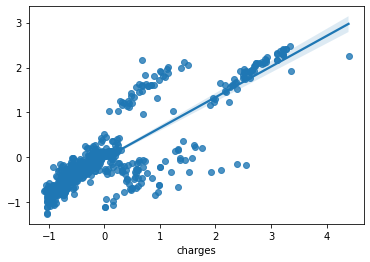

In [35]:
y_pred = lin_reg.predict(X_test)
sns.regplot(y_test, y_pred);

### POLYNOMIAL REGRESSION

In [36]:
poly_reg = PolynomialFeatures(degree=2)
poly_reg.fit(X_train), 
X_poly = poly_reg.transform(X_train)

pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)


LinearRegression()

Polynomial Regression Prediction Scores:

In [37]:
predictions = pol_reg.predict(X_poly_test)
print('The model performance:' ) 
print('-------------------------------')
print('SCORE:', pol_reg.score(X_poly_test, y_test))
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

The model performance:
-------------------------------
SCORE: -3.664963297002723e+23
MAE: 573904503197.2291
MSE: 3.6575138724339934e+23
RMSE: 604773831480.3306


### LASSO

In [38]:
from sklearn.linear_model import Lasso
Lasso = Lasso()
Lasso = Lasso.fit(X_train, y_train)

Lasso Predictions Scores:

In [39]:
predictions = Lasso.predict(X_test)
print('The model performance:' ) 
print('-------------------------------')
print('SCORE:', Lasso.score(X_test, y_test))
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

The model performance:
-------------------------------
SCORE: -3.6374026398222625e-05
MAE: 0.7122690305959597
MSE: 0.9980036945885473
RMSE: 0.9990013486420063


### RIDGE

In [40]:
from sklearn.linear_model import Ridge
Ridge = Ridge()
Ridge = Ridge.fit(X_train, y_train)

Ridge Predictions Scores:

In [41]:
predictions = Ridge.predict(X_test)
print('The model performance:' ) 
print('-------------------------------')
print('SCORE:', Ridge.score(X_test, y_test))
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

The model performance:
-------------------------------
SCORE: 0.7166143508381775
MAE: 0.35626052230011124
MSE: 0.28280963793163694
RMSE: 0.5317984937282513


### Decision Tree Regressor

In [42]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

Decision Tree Predicitions Scores:

In [43]:
predictions = dtr.predict(X_test)
print('The model performance:' ) 
print('-------------------------------')
print('SCORE:', dtr.score(X_test, y_test))
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

The model performance:
-------------------------------
SCORE: 0.819837132665133
MAE: 0.13784615068083464
MSE: 0.1797966672991409
RMSE: 0.42402437111461044


### Random Forest Regressor

In [44]:
rf = RandomForestRegressor(max_depth=2, random_state=0)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=0)

Random Forest Predictions Scores:

In [45]:
predictions = rf.predict(X_test)
print('The model performance:' ) 
print('-------------------------------')
print('SCORE:', rf.score(X_test, y_test))
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

The model performance:
-------------------------------
SCORE: 0.7581842765526132
MAE: 0.3160243925501415
MSE: 0.2413242074770011
RMSE: 0.49124760302417875


### Support Vector Machine (SVM)

In [46]:
svr = svm.SVR(C=1.0, epsilon=0.2)
svr.fit(X_train, y_train)


SVR(epsilon=0.2)

SVM Predictions Scores:

In [47]:
predictions = svr.predict(X_test)
print('The model performance:' ) 
print('-------------------------------')
print('SCORE:', svr.score(X_test, y_test))
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

The model performance:
-------------------------------
SCORE: 0.8124478442507077
MAE: 0.265500883810115
MSE: 0.18717093620526593
RMSE: 0.432632564892272


### KNN

In [48]:
knn = KNeighborsRegressor(n_neighbors=1000)
knn.fit(X_train, y_train)


KNeighborsRegressor(n_neighbors=1000)

KNN Predictions Scores:

In [49]:
predictions = knn.predict(X_test)
print('The model performance:' ) 
print('-------------------------------')
print('SCORE:', knn.score(X_test, y_test))
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

The model performance:
-------------------------------
SCORE: 0.391009569821097
MAE: 0.4788812217541107
MSE: 0.607752592878757
RMSE: 0.7795848849732511


### Comparing Model Results:

Now we compare the perfomarnce of the eight models employed with the Standarized Data:

* Liner Regression
Score: 0.71

* Polynomial Regression
Score: 0.80

* Lasso
Score: -3.63

* Ridge
Score: 0.71

* Decision Tree Regressor
Score: 8.83

* Random Forest Regressor
Score: 0.75

* SVM
Score: 0.81

* KNN
Score: 0.39

In the case of the standarized data we see that some of the results are prone to errors, specificaly in Lasso, which performed rather poorly compared to the non scaled data Lasso model.

Linear Regression, Polynomial Regression, Ridge, Random Forest Regressor, obtained scores similar to the models with non-standardized data.

The standarization greatly benefitted both the SVN and KNN models. Both models improved considerably, in fact, the Support Vector Machine model with standardized data has one of the best scores overall, the KNN scores is still bad, but considerably better, showing how sensitive are this models to data scaling issues and outliers.

Nonetheless the Decission Tree Regressor is still the best model and with the standarized data it improved its performance even more.

We now compare all the results together:

Regular Data
* Liner Regression 
Score: 0.71

* Polynomial Regression
Score: 0.80

* Lasso
Score: 0.71

* Ridge
Score: 0.71

* Decision Tree Regressor
Score: 0.82

* Random Forest Regressor
Score: 0.75

* SVM
Score: -0.09

* KNN
Score: -1.43
-------------------------------------------
Scalated Data
* Liner Regression
Score: 0.71

* Polynomial Regression
Score: 0.80

* Lasso
Score: -3.63

* Ridge
Score: 0.71

* Decision Tree Regressor
Score: 0.82

* Random Forest Regressor
Score: 0.75

* SVM
Score: 0.81

* KNN
Score: 0.39

Basing ourselves in the Score of each model (which is basically the R2Score), we could choose the standarized Decision Tree Regressor data model as our main model, nonetheless we will grab the Top performing models and make a grid search to each one to see if we can improe their scores.

### Grid Search Decission Tree Resgressor

In [168]:
# code gridsearch modelo 1

parameters = {"max_depth":[3,5,10,15,20], "max_features":[3,4,6,8], "min_samples_split":range(2,10)}

dtr = DecisionTreeRegressor()

regressor = GridSearchCV(estimator = dtr,
                  param_grid = parameters,
                  n_jobs = -1,
                  cv = 10)

regressor.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, 15, 20],
                         'max_features': [3, 4, 6, 8],
                         'min_samples_split': range(2, 10)})

In [169]:
regressor.best_estimator_.predict(X)

array([-0.87801169,  0.71251679, -0.88560459, ..., -0.21400611,
       -0.0885658 , -0.4917497 ])

In [170]:
print(regressor.best_params_)
print(regressor.best_score_)

{'max_depth': 10, 'max_features': 4, 'min_samples_split': 7}
0.847377333762535


### Grid Search Polynomial Regression

In [171]:
# code gridsearch modelo 3
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

parameters = {'polynomialfeatures__degree': np.arange(10), 'linearregression__fit_intercept': [True, False], 'linearregression__normalize': [True, False]}

poly_grid = GridSearchCV(estimator=PolynomialRegression(), param_grid = parameters, cv=10, scoring='neg_mean_squared_error',n_jobs=7)

poly_grid.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=7,
             param_grid={'linearregression__fit_intercept': [True, False],
                         'linearregression__normalize': [True, False],
                         'polynomialfeatures__degree': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='neg_mean_squared_error')

In [172]:
poly_grid.best_estimator_.predict(X)

array([-0.85524821,  0.98290229, -0.90881741, ...,  0.0194999 ,
       -0.23763347, -0.38129139])

In [173]:
print(poly_grid.best_params_)
print(poly_grid.best_score_)

{'linearregression__fit_intercept': True, 'linearregression__normalize': False, 'polynomialfeatures__degree': 5}
-0.173031935582509


### Grid Search Random Forest

In [174]:
# code gridsearch modelo 4
parameters = param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

rf = RandomForestRegressor()

rf = GridSearchCV(estimator = rf,
                  param_grid = parameters,
                  n_jobs = -1,
                  cv = 3)

rf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]})

In [175]:
rf.best_estimator_.predict(X)

array([-0.81296982,  0.71472402, -0.77011798, ..., -0.0068248 ,
       -0.18745289, -0.17380446])

In [176]:
print(rf.best_params_)
print(rf.best_score_)

{'bootstrap': True, 'max_depth': 100, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 200}
0.8699983674289317


### Grid Search SVM

In [177]:
# code gridsearch modelo 2 - fail

#modelsvr = svm.SVR()

#parameters = {'kernel' : ('linear', 'poly', 'rbf', 'sigmoid'),'C' : [1,5,10],'degree' : [3,6],'coef0' : [0.01,10,0.5],'gamma' : ('auto','scale')}

#grids = GridSearchCV(estimator= modelsvr,param_grid = parameters,cv=3, n_jobs=6)

#grids.fit(X_train,y_train)

The SVM Grid search unfortunatly requires a lot of processing power and freezes Visual Studio Code everytime it is ran, hence it will be commented as a reference but will not be taken into account. For future reference a higher performing system or a cloud environment would be best suited for running this grid search.

As both the Decision Tree and the Random Forest yielded imporved results with the Gridsearch, we will retrain those models with the standarized data and the parameters from the Grid Search.

### Decision Tree Regressor (improved parameters)

In [52]:
dtr = DecisionTreeRegressor(max_depth= 10, max_features= 4, min_samples_split= 6)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, max_features=4, min_samples_split=6)

In [53]:
predictions = dtr.predict(X_test)
print('The model performance:' ) 
print('-------------------------------')
print('SCORE:', dtr.score(X_test, y_test))
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

The model performance:
-------------------------------
SCORE: 0.8440532219209477
MAE: 0.179611967867242
MSE: 0.15562979979962824
RMSE: 0.3944994294034254


### Random Forest Regressor (improved parameters)

In [50]:
rf = RandomForestRegressor(bootstrap= True, max_depth= 110, max_features= 3, min_samples_leaf= 3, min_samples_split= 8, n_estimators= 200)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=110, max_features=3, min_samples_leaf=3,
                      min_samples_split=8, n_estimators=200)

In [51]:
predictions = rf.predict(X_test)
print('The model performance:' ) 
print('-------------------------------')
print('SCORE:', rf.score(X_test, y_test))
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

The model performance:
-------------------------------
SCORE: 0.8788778128609418
MAE: 0.17414493655693764
MSE: 0.12087599351484649
RMSE: 0.34767225013631226


We retrain the model with non scalated data and create a new entry for the model to test and see the results we will get from the predictions:

In [52]:
X = df.iloc[:, :-1]
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [53]:
rf = RandomForestRegressor(bootstrap= True, max_depth= 110, max_features= 3, min_samples_leaf= 3, min_samples_split= 8, n_estimators= 200)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)

In [54]:
test_variable = X_train.iloc[2]
test_variable.array

<PandasArray>
[21.0, 1.0, 1.0, 25.7, 4.0]
Length: 5, dtype: float64

In [55]:
test_variable

age           21.0
sex_male       1.0
smoker_yes     1.0
bmi           25.7
children       4.0
Name: 3586, dtype: float64

In [56]:
New_customer_1= [[30, 0, 1, 21, 3]]
print("New customer 1 Insurance cost:", rf.predict(New_customer_1))

New_customer_2= [[65, 0, 1, 21, 3]]
print("New customer 2 Insurance cost:", rf.predict(New_customer_2))

New_customer_2= [[65, 0, 0, 21, 3]]
print("New customer 3 Insurance cost:", rf.predict(New_customer_2))

New customer 1 Insurance cost: [17441.53071221]
New customer 2 Insurance cost: [25664.17295522]
New customer 3 Insurance cost: [16482.60477015]


In [64]:
from sklearn import model_selection
import pickle
model = rf
#  Save Model Using Pickle
# We save the train Random Forest Regressor model as final_model_pkl
with open('../model/final_model_pkl', 'wb') as files:
    pickle.dump(model, files)


We do a test loading the model to see if it works and yields similar results

In [65]:
# load saved model
with open('../model/final_model_pkl' , 'rb') as f:
    rf2 = pickle.load(f)

In [66]:
rf2.predict(New_customer_1) #Same result

array([17441.53071221])